<a href="https://www.kaggle.com/code/kiranpathak97/tiktok-claim-classification-inspect?scriptVersionId=141005545" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

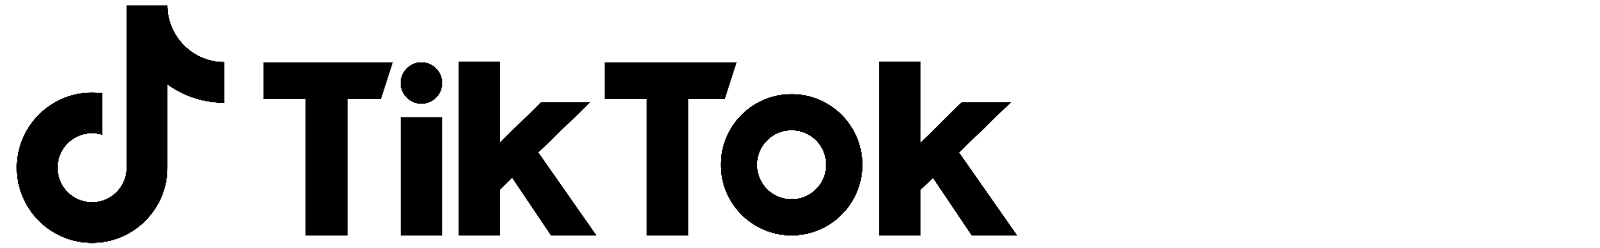

**Background**: 

TikTok is the leading destination for short-form mobile video. The platform is built to help imaginations thrive. TikTok's mission is to create a place for inclusive, joyful, and authentic content–where people can safely discover, create, and connect!

**Goal**: Investigate and understand the data, and prepare for exploratory data analysis.


# Imports and data loading

Begin by importing the necessary packages to load and delve into the dataset.

In [1]:
#import packages
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("/kaggle/input/tiktok-dataset/tiktok-data.csv")

In [3]:
# Display and examine the first 10 rows of the dataframe
df.head(10)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
5,6,claim,8972200955,35,someone shared with me that gross domestic pro...,not verified,under review,336647.0,175546.0,62303.0,4293.0,1857.0
6,7,claim,4958886992,16,someone shared with me that elvis presley has ...,not verified,active,750345.0,486192.0,193911.0,8616.0,5446.0
7,8,claim,2270982263,41,someone shared with me that the best selling s...,not verified,active,547532.0,1072.0,50.0,22.0,11.0
8,9,claim,5235769692,50,someone shared with me that about half of the ...,not verified,active,24819.0,10160.0,1050.0,53.0,27.0
9,10,claim,4660861094,45,someone shared with me that it would take a 50...,verified,active,931587.0,171051.0,67739.0,4104.0,2540.0


In [4]:
#get summary info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [5]:
#get summary statsistics
df.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


# Understand the data - Investigate the variables

In [6]:
# values of claim status and count of each value
df['claim_status'].value_counts()

claim      9608
opinion    9476
Name: claim_status, dtype: int64

>The counts of each claim status are quite balanced.

Examine the engagement trends associated with each different claim status.

In [7]:
# average view count of videos with "claim" status
claim_df = df[df['claim_status'] == 'claim']
print("Mean view count claims:", claim_df['video_view_count'].mean())
print("Median view count claims:", claim_df['video_view_count'].median())

Mean view count claims: 501029.4527477102
Median view count claims: 501555.0


In [8]:
# average view count of videos with "opinion" status
opinion_df = df[df['claim_status'] == 'opinion']
print("Mean view count claims:", opinion_df['video_view_count'].mean())
print("Median view count claims:", opinion_df['video_view_count'].median())

Mean view count claims: 4956.43224989447
Median view count claims: 4953.0


>The mean and the median within each claim category are close to one another, but there is a vast discrepancy between view counts for videos labeled as claims and videos labeled as opinions.

Examine trends associated with the ban status of the author.

In [9]:
# Get counts for each group combination of claim status and author ban status
df.groupby(['claim_status','author_ban_status']).count()[['#']]

#
claim_status author_ban_status      
claim        active             6566
             banned             1439
             under review       1603
opinion      active             8817
             banned              196
             under review        463

>There are many more claim videos with banned authors than there are opinion videos with banned authors. This could mean a number of things, including the possibilities that:
>* Claim videos are more strictly policed than opinion videos
>* Authors must comply with a stricter set of rules if they post a claim than if they post an opinion

Also, it should be noted that there's no way of knowing if claim videos are inherently more likely than opinion videos to result in author bans, or if authors who post claim videos are more likely to post videos that violate terms of service.

Finally, while you can use this data to draw conclusions about banned/active authors, you cannot draw conclusions about banned videos. There's no way of determining whether a particular video _caused_ the ban, and banned authors could have posted videos that complied with the terms of service.

Continue investigating engagement levels, now focusing on `author_ban_status`.

In [10]:
# mean and median of video view,like, share count of each author ban status.
df.groupby(['author_ban_status']).agg({
    'video_view_count': ['mean','median'],
    'video_like_count': ['mean','median'],
    'video_share_count': ['mean','median']
})

video_view_count           video_like_count            \
                              mean    median             mean    median   
author_ban_status                                                         
active               215927.039524    8616.0     71036.533836    2222.0   
banned               445845.439144  448201.0    153017.236697  105573.0   
under review         392204.836399  365245.5    128718.050339   71204.5   

                  video_share_count           
                               mean   median  
author_ban_status                             
active                 14111.466164    437.0  
banned                 29998.942508  14468.0  
under review           25774.696999   9444.0

In [11]:
# median video share count of each author ban status
df.groupby('author_ban_status').median(numeric_only=True)[['video_share_count']]

,video_share_count
author_ban_status,
active,437.0
banned,14468.0
under review,9444.0


>Banned authors have a median share count that's 33 times the median share count of active authors! Exploring this in more depth.

In [12]:
df.groupby(['author_ban_status']).agg(
    {'video_view_count': ['count', 'mean', 'median'],
     'video_like_count': ['count', 'mean', 'median'],
     'video_share_count': ['count', 'mean', 'median']
     })

video_view_count                          video_like_count  \
                             count           mean    median            count   
author_ban_status                                                              
active                       15383  215927.039524    8616.0            15383   
banned                        1635  445845.439144  448201.0             1635   
under review                  2066  392204.836399  365245.5             2066   

                                           video_share_count                \
                            mean    median             count          mean   
author_ban_status                                                            
active              71036.533836    2222.0             15383  14111.466164   
banned             153017.236697  105573.0              1635  29998.942508   
under review       128718.050339   71204.5              2066  25774.696999   

                            
                    median  
author_ban_status           
active               437.0  
banned             14468.0  
under review        9444.0

> A few observations stand out:
> * Banned authors and those under review get far more views, likes, and shares than active authors.
>* In most groups, the mean is much greater than the median, which indicates that there are some videos with very high engagement counts.

Now, create three new columns to help better understand engagement rates:
* `likes_per_view`: represents the number of likes divided by the number of views for each video
* `comments_per_view`: represents the number of comments divided by the number of views for each video
* `shares_per_view`: represents the number of shares divided by the number of views for each video

In [13]:
# Create a likes_per_view column
df['likes_per_view'] = df['video_like_count'] / df['video_view_count']

# Create a comments_per_view column
df['comments_per_view'] = df['video_comment_count'] / df['video_view_count']

# Create a shares_per_view column
df['shares_per_view'] = df['video_share_count'] / df['video_view_count']

In [14]:
df.groupby(['claim_status','author_ban_status']).agg({
    'likes_per_view':['count','mean','median'],
    'comments_per_view':['count','mean','median'],
    'shares_per_view':['count','mean','median']
})

likes_per_view                      \
                                        count      mean    median   
claim_status author_ban_status                                      
claim        active                      6566  0.329542  0.326538   
             banned                      1439  0.345071  0.358909   
             under review                1603  0.327997  0.320867   
opinion      active                      8817  0.219744  0.218330   
             banned                       196  0.206868  0.198483   
             under review                 463  0.226394  0.228051   

                               comments_per_view                      \
                                           count      mean    median   
claim_status author_ban_status                                         
claim        active                         6566  0.001393  0.000776   
             banned                         1439  0.001377  0.000746   
             under review                   1603  0.001367  0.000789   
opinion      active                         8817  0.000517  0.000252   
             banned                          196  0.000434  0.000193   
             under review                    463  0.000536  0.000293   

                               shares_per_view                      
                                         count      mean    median  
claim_status author_ban_status                                      
claim        active                       6566  0.065456  0.049279  
             banned                       1439  0.067893  0.051606  
             under review                 1603  0.065733  0.049967  
opinion      active                       8817  0.043729  0.032405  
             banned                        196  0.040531  0.030728  
             under review                  463  0.044472  0.035027

We know that videos by banned authors and those under review tend to get far more views, likes, and shares than videos by non-banned authors. However, *when a video does get viewed*, its engagement rate is less related to author ban status and more related to its claim status.

Also, we know that claim videos have a higher view rate than opinion videos, but this tells us that claim videos also have a higher rate of likes on average, so they are more favorably received as well. Furthermore, they receive more engagement via comments and shares than opinion videos.

Note that for claim videos, banned authors have slightly higher likes/view and shares/view rates than active authors or those under review. However, for opinion videos, active authors and those under review both get higher engagement rates than banned authors in all categories.

# Key Insights:
* Of the 19,382 samples in this dataset, just over 50% are claims&mdash;9,608 of them.  
* Engagement level is strongly correlated with claim status. This should be a focus of further inquiry.
* Videos with banned authors have significantly higher engagement than videos with active authors. Videos with authors under review fall between these two categories in terms of engagement levels.

# Next Steps:
Begin the process of exploratory data analysis.